# Face Recognition system by using FaceNet model

we are building a Face Recognition system for an office building where the building manager would like to offer facial recognition to allow the employees to enter the building.

In this way, no one has to carry an ID card anymore. An authorized person can just walk up to the building, and the door will unlock for them!

This system takes an image as input, and figures out if it is one of the authorized persons or not.


<a name='1'></a>
## 1 - Packages

In [1]:
import os
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL

%matplotlib inline


<a name='2'></a>
## 2 - Encoding Face Images into a 128-Dimensional Vector by using pretrained faceNet model

<a name='3'></a>
###  Load pretrained model and weights

In [1]:
from tensorflow.keras.models import model_from_json

json_file = open('keras-facenet-h5/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

model.load_weights('keras-facenet-h5/model.h5')

In [ ]:
print(model.inputs)
print(model.outputs)

In [4]:
FRmodel = model

<a name='3'></a>
##  3 - Create a databse as a python dictionary
Now you'll build a database containing one encoding vector for each person who is allowed to enter the office. This database maps each person's name to a 128-dimensional encoding of their face.

In [5]:
def img_to_encoding(image_path, model):
    img1 = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img = np.around(np.array(img1) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.predict_on_batch(x_train)
    return {"encoded":embedding / np.linalg.norm(embedding, ord=2),"image":img1}

In [11]:
database = {}
database["01.00 Danielle"] = img_to_encoding("images/danielle.png", FRmodel)
database["02.00 Younes"] = img_to_encoding("images/younes.jpg", FRmodel)
database["03.00 Tian"] = img_to_encoding("images/tian.jpg", FRmodel)
database["04.00 Andrew"] = img_to_encoding("images/andrew.jpg", FRmodel)
database["05.00 Kian"] = img_to_encoding("images/kian.jpg", FRmodel)
database["06.00 Dan"] = img_to_encoding("images/dan.jpg", FRmodel)
database["07.00 Sebastiano"] = img_to_encoding("images/sebastiano.jpg", FRmodel)
database["08.00 Bertrand"] = img_to_encoding("images/bertrand.jpg", FRmodel)
database["09.00 Kevin"] = img_to_encoding("images/kevin.jpg", FRmodel)
database["10.00 Felix"] = img_to_encoding("images/felix.jpg", FRmodel)
database["11.00 Benoit"] = img_to_encoding("images/benoit.jpg", FRmodel)
database["12.00 Arnaud"] = img_to_encoding("images/arnaud.jpg", FRmodel)
database["13.00 Salman"] = img_to_encoding("images/Salman.jpg", FRmodel)
database["14.00 Sonalika"] = img_to_encoding("images/Sonalika.jpg", FRmodel)
database["14.01 Sonalika"] = img_to_encoding("images/Sonalika1.jpg", FRmodel)
database["14.02 Sonalika"] = img_to_encoding("images/Sonalika4.jpg", FRmodel)
database["15.00 Syam1"] = img_to_encoding("images/syam1.jpg", FRmodel)
database["16.00 Anita"] = img_to_encoding("images/Anita.jpg", FRmodel)
database["16.01 Anita"] = img_to_encoding("images/Anita1.jpg", FRmodel)
database["16.02 Anita"] = img_to_encoding("images/Anita3.jpg", FRmodel)
database["17.03 Anita"] = img_to_encoding("images/Anita2.jpg", FRmodel)
database["18.00 Salman"] = img_to_encoding("images/Salman1.jpg", FRmodel)
database["18.02 Salman"] = img_to_encoding("images/Salman2.jpg", FRmodel)
database["18.03 Salman"] = img_to_encoding("images/Salman3.jpg", FRmodel)
database["18.04 Salman"] = img_to_encoding("images/Salman4.jpg", FRmodel)
database["18.05 Salman"] = img_to_encoding("images/Salman5.jpg", FRmodel)
database["18.06 Salman"] = img_to_encoding("images/Salman12.jpg", FRmodel)
database["18.07 Salman"] = img_to_encoding("images/Salman13.jpg", FRmodel)


In [12]:
len(database)

28

In [13]:
def Recognise(image_path, database, model):
    
    encoding =  img_to_encoding(image_path, model)
    
    ## Find the closest encoding ##
    
    # Initialize "min_dist" to a large value, say 100
    min_dist = 100
    c=0
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        # Compute L2 distance between the target "encoding" and the current db_enc from the database. 
        dist =np.linalg.norm(tf.subtract(db_enc["encoded"],encoding["encoded"]))
        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name.
        if dist<min_dist:
            min_dist = dist
            identity = name
        c+=1
    print("we find the distance:" +str(min_dist))
    
    if min_dist > 0.75:
        print("Not in the database.")
    else:
        print ("Hello! " + str(identity[6:]) + ", Please, Welcome in!")
    fig = plt.figure(figsize=(10, 7))
    rows = 1
    columns = 2
    fig.add_subplot(rows, columns, 1)
    plt.imshow(database[identity]["image"])
    plt.axis('off')
    plt.title("Image in Database")
    fig.add_subplot(rows, columns, 2)
    plt.imshow(encoding["image"])
    plt.axis('off')
    plt.title("Your Image")
  
    print(c)
        
    return min_dist, identity

we find the distance:0.56715995
Hello! Salman, Please, Welcome in!
28


(0.56715995, '18.00 Salman')

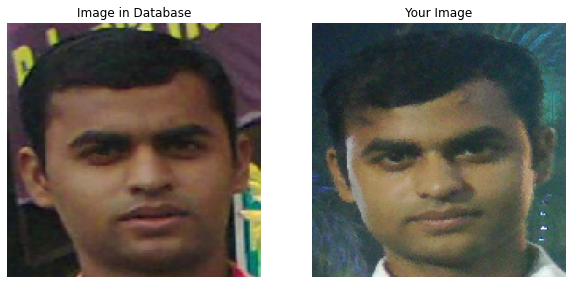

In [14]:
Recognise("images/Salman22.jpg", database, FRmodel)

we find the distance:0.7173409
Hello! Sonalika, Please, Welcome in!
28


(0.7173409, '14.02 Sonalika')

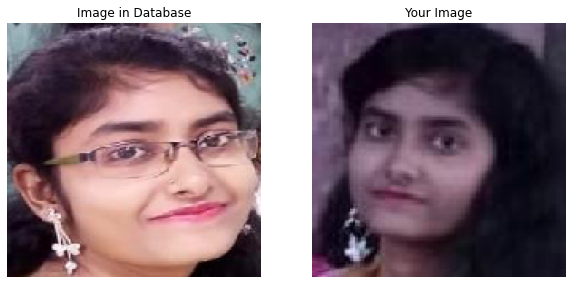

In [20]:
Recognise("images/Sonalika2.jpg", database, FRmodel)